In [ ]:
import pandas as pd
import numpy as np

# Series

In [ ]:
# 生成一个Series
ser_obj = pd.Series(range(10, 20))
print(ser_obj)
print('\n')
# 获取数据
print(ser_obj.values)
print('\n')
# 获取索引
print(ser_obj.index)
print('\n')
print(ser_obj.dtype)

In [ ]:
print(ser_obj[0])
# 访问不存在的索引下标会报错
# ser_obj[10]

In [ ]:
print(ser_obj * 2)
print('\n')
print(ser_obj > 15)

In [ ]:
# 字典变为Series
year_data = {2001: 17.8, 2005: 20.1, 2003: 16.5}
ser_obj2 = pd.Series(year_data)
print(ser_obj2)
print('\n')
print(ser_obj2.index)
print('\n')
print(ser_obj2[2001])
print('\n')
print(ser_obj2.values)

In [ ]:
print(ser_obj2.name)
print('\n')
# 索引名字
print(ser_obj2.index.name)
print('\n')
ser_obj2.name = 'temp'
ser_obj2.index.name = 'year'
# head默认显示前五行
print(ser_obj2.head())

# DateFrame

In [ ]:
# 通过ndarray构建DataFrame
t = pd.DataFrame(np.arange(12).reshape(3, 4))
print(t)
print('\n')
array = np.random.randn(5, 4)
print(array)
print('\n')
df_obj = pd.DataFrame(array)
print(df_obj.head())

In [ ]:
# 字典变df
d2 = [{"name": "xiaohong", "age": 32, "tel": 10010},
      {"name": "xiaogang", "tel": 10000},
      {"name": "xiaowang", "age": 22}]
df1 = pd.DataFrame(d2)
print(df1)
print('\n')
print(df1.values)
print('\n')
print(type(df1.values))

In [ ]:
# df中不同列可以是不同的数据类型,同一列必须是一个数据类型
dict_data = {'A': 1,
             'B': pd.Timestamp('20190926'),
             'C': pd.Series(1, index=list(range(4)), dtype='float32'),
             'D': np.array([1, 2, 3, 4], dtype='int32'),
             'E': ["Python", "Java", "C++", "C"],
             'F': 'yf'}
df_obj2 = pd.DataFrame(dict_data)
print(df_obj2)
print('\n')
print(df_obj2.index)
print('\n')
# df_obj2.index[0] = 2  # 不可以单独修改某个索引值
print(df_obj2.columns)
print('\n')
print(df_obj2.dtypes)  # object

In [ ]:
dates = pd.date_range('20130101', periods=6)
print(dates)
print('\n')
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('abcd'))
print(df)
print('\n')
print(df.index)

In [ ]:
print(df_obj2)
print('\n')
# 使用索引名来取某一行或者列
print(df_obj2['A'])
print('\n')
# 取出来的一列是Series
print(type(df_obj2['A']))

In [ ]:
# 增加列数据，列名自定义
df_obj2['G'] = df_obj2['D'] + 4
print(df_obj2['G'])

In [ ]:
# 删除列
del (df_obj2['G'])
print(df_obj2.head())

# pandas的索引操作

In [ ]:
print(df_obj2.index)

In [ ]:
# 索引对象的值不可变
# df_obj2.index[0] = 2

常见的Index种类
Index，索引
Int64Index，整数索引
MultiIndex，层级索引
DatetimeIndex，时间戳类型

In [ ]:
ser_obj = pd.Series(range(5), index=list('abcde'))
print(ser_obj)
print('\n')
print(ser_obj.index)

In [ ]:
# 行索引，可以用索引名、索引顺序来取
print(ser_obj['b'])
print('\n')
print(ser_obj[2])

In [ ]:
# 切片索引
print(ser_obj[1:3])  # 索引顺序是开区间
print('\n')
print(ser_obj['b':'d'])  # 索引名是闭区间

In [ ]:
# 不连续索引
print(ser_obj[[0, 2, 4]])
print('\n')
print(ser_obj[['a', 'e']])

In [ ]:
# 布尔索引
ser_bool = ser_obj > 2
print(ser_bool)
print('\n')
print(ser_obj[ser_bool])
print('\n')
print(ser_obj[ser_obj > 2])

# DataFrame索引

In [ ]:
df_obj = pd.DataFrame(np.random.randn(5, 4), columns=list('abcd'))
print(df_obj)

In [ ]:
# 列索引
print(df_obj['a'])  # 返回Series类型
print('\n')
print(df_obj[['a']])  # 返回DataFrame类型
print('\n')
print(type(df_obj[['a']]))

loc 标签索引

In [ ]:
# 建议使用loc，效率更高

# Series
print(ser_obj)
print('\n')
print(ser_obj['b':'d'])
print('\n')
print(ser_obj.loc['b':'d'])

In [ ]:
# DataFrame
df_obj = pd.DataFrame(np.random.randn(5, 4), columns=list('dcba'), index=list('abcde'))
print(df_obj)
print('\n')
print(df_obj['a'])  # 不建议用
print('\n')
print(df_obj.loc['a'])  # 拿的是行
print('\n')
# 第一个参数是行，第二个参数是列
print(df_obj.loc['a':'c', 'd':'b'])
print('\n')
print(df_obj.loc[['a', 'c'], 'd':'b'])

iloc 位置索引

In [ ]:
# Series
print(ser_obj[1:3])
print('\n')
print(ser_obj.iloc[1:3])  # 左闭右开

In [ ]:
# DataFrame
print(df_obj.iloc[0:2, 0:2])

# 对齐运算

In [ ]:
# Series对齐运算
s1 = pd.Series(range(10, 20), index=range(10))
s2 = pd.Series(range(20, 25), index=range(5))
s3 = s1 + s2
print(s3)
print('\n')
print(s3[6])
print('\n')
# 未对齐的数据将和填充值做运算
print(s1.add(s2, fill_value=0))  # 填充值设为0

In [ ]:
# df对齐运算
df1 = pd.DataFrame(np.ones((2, 2)), columns=['a', 'b'])
df2 = pd.DataFrame(np.ones((3, 3)), columns=['a', 'b', 'c'])
print(df2)
print('\n')
print(df1 - df2)
print('\n')
print(df1.sub(df2, fill_value=2))

# pandas的函数应用

In [ ]:
df = pd.DataFrame(np.random.randn(5, 4) - 1)
print(df)
print('\n')
print(np.abs(df))

In [ ]:
# apply，默认作用在列上
print(df.apply(lambda x: x.max()))
# 作用在行上
print(df.apply(lambda x: x.max(), axis=1))

In [ ]:
type('%.2f' % 1.3456)

# 索引排序

In [ ]:
# Series
print(np.random.randint(5, size=5))
print('\n')
s4 = pd.Series(range(10, 15), index=np.random.randint(5, size=5))
print(s4)
print('\n')
# 索引排序,sort_index返回一个新的排好索引的series
print(s4.sort_index())
print('\n')
print(s4)
print('\n')
# print(s4.loc[0:3])  # loc索引不唯一时会报错
print(s4.iloc[0:3])
print('\n')
print(s4[0:3])  # 默认用的位置索引

In [ ]:
# DataFrame
df4 = pd.DataFrame(np.random.randn(5, 5),
                   index=np.random.randint(5, size=5),
                   columns=np.random.randint(5, size=5))
print(df4)
print('\n')
# 轴0是行索引序列，ascending默认为True，升序
df4_isort = df4.sort_index(axis=0)
print(df4_isort)
print('\n')
# 轴1是列索引序列，ascending默认为True，升序
df4_isort = df4.sort_index(axis=1, ascending=False)
print(df4_isort)

# 按值排序

In [ ]:
# 按值排序,by后是column的值
import random

l = [random.randint(0, 100) for i in range(24)]
df4 = pd.DataFrame(np.array(l).reshape(6, 4))
print(df4.values)
print('\n')
print(df4)
print('\n')
# 按轴零排序，by后是列名
df4_vsort = df4.sort_values(by=3, axis=0, ascending=False)  # 寻找的是columns里的3
print(df4_vsort)
print('\n')
# 按轴1排序，by后是行名
df4_vsort = df4.sort_values(by=3, axis=1, ascending=False)  # 寻找的是index里的3
print(df4_vsort)

# 处理缺失数据

In [ ]:
df_data = pd.DataFrame([np.random.randn(3), [1., 2., np.nan],
                        [np.nan, 4., np.nan], [1., 2., 3.]])
print(df_data.head())

In [ ]:
# isnull来判断是否有空的数据
print(df_data.isnull())

In [ ]:
# 默认某一行有空值，删除整行
print(df_data.dropna(inplace=True))
print('\n')
print(df_data)

In [ ]:
# 某列有空值，就删除该列，常用于某个特征确实太多时
print(df_data.dropna(axis=1))

In [ ]:
# 给零列的空值填为-100，按特征（按列）去填充
print(df_data.iloc[:, 0].fillna(-100.))

In [ ]:
# 依次拿每一列
for i in df_data.columns:
    print(df_data.loc[:, i])

# 层级索引（hierarchical indexing）

In [ ]:
# MultiIndex是层级索引，索引类型的一种
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                                    [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])

ser_obj = pd.Series(np.random.randn(12), index=index1)
print(ser_obj)
print('\n')
print(type(ser_obj))
print('\n')
print(type(ser_obj.index))
print('\n')
print(ser_obj.index)
print('\n')
print(ser_obj.index.levels)
print('\n')
print(ser_obj.index.codes)

In [ ]:
# 层级索引如何取数据
print(ser_obj)
print('\n')
print(ser_obj['c'])
print('\n')
print(ser_obj['a', 2])
print('\n')
print(ser_obj[:, 2])

In [ ]:
# 交换层级
print(ser_obj)
print('\n')
print(ser_obj.swaplevel())
print('\n')
print(ser_obj)
print('\n')
ser_obj = ser_obj.swaplevel()
print(ser_obj)

In [ ]:
print(ser_obj.sort_index(level=1))  # 层级索引按哪个索引级别排序
print('\n')
# 把0索引（最外层索引）变为列索引
df_obj = ser_obj.unstack(0)  # unstack可以放索引名，或者索引位置
print(df_obj)

In [ ]:
print(df_obj)
print('\n')
# 对df进行stack，就会把行、列索引进行堆叠，变为Series
# 把列索引放入内层,只能放到内层
print(df_obj.stack())  # stack变为sSeries和unstack保持一致的
print('\n')
df_obj = df_obj.transpose()
print(df_obj)

# Pandas统计计算和描述

In [ ]:
print(df_obj)
print('\n')
df_obj.loc[0, 'b'] = np.nan
print(df_obj)
print('\n')
print(df_obj.min(axis=0, skipna=True))
print('\n')
# 观察数据分布的一种常用方法
print(df_obj.describe())

In [ ]:
df_obj.loc[:, 'c']

In [ ]:
# 计算最小值或者最大值的索引的位置
print(df_obj.loc[:, 'c'].argmax())  # argmin和argmax只能是Series，不能是df

In [ ]:
# 计算最小值或者最大值的索引值,返回的是一个Series
df_obj.idxmin(axis=1)

In [ ]:
from matplotlib import pyplot as plt

file_path = "IMDB-Movie-Data.csv"
df = pd.read_csv(file_path)
# 打印数据信息
print(df.info())
print('\n')
print(df.describe())

In [ ]:
# 获取平均评分
print(df["Rating"].mean())
print('\n')
# 导演的人数
print(len(set(df["Director"].tolist())))
print('\n')
# 导演的人数
print(len(df["Director"].unique()))
print('\n')
# 获取演员的人数
temp_actors_list = df["Actors"].str.split(", ").tolist()  # 二维列表
print(temp_actors_list)
print('\n')
actors_list = [i for j in temp_actors_list for i in j]  # 二维展为一维
actors_num = len(set(actors_list))
print(actors_num)

In [ ]:
# rating,runtime分布情况
# 选择图形，直方图
# 准备数据
runtime_data = df["Runtime (Minutes)"].values

max_runtime = runtime_data.max()
min_runtime = runtime_data.min()

# 计算组数
print(max_runtime - min_runtime)
print('\n')
num_bin = (max_runtime - min_runtime) // 5

# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(runtime_data, int(num_bin))

plt.xticks(range(min_runtime, max_runtime + 5, 5))

plt.show()

In [ ]:
# 获取平均评分
print(df["Rating"].mean())

# rating分布情况
# 选择图形，直方图
# 准备数据
rating_data = df["Rating"].values
max_ranting = rating_data.max()
min_ranting = rating_data.min()
print('\n')
print(max_ranting, min_ranting)

In [ ]:
# 计算组数
print(max_ranting - min_ranting)
num_bin = (max_ranting - min_ranting) // 0.5
print(num_bin)
# 设置图形的大小
plt.figure(figsize=(20, 8), dpi=80)
# 第二个bins参数必须为int或sequence或str，bins代表划分为多少个单元
plt.hist(rating_data, int(num_bin))
plt.grid(alpha=0.5)
#因为range的步长不支持0.5,自己做一个列表
_x = [min_ranting]
i = min_ranting
while i <= max_ranting + 0.5:
    i = i + 0.5
    _x.append(i)

plt.xticks(_x)

plt.show()

## 导演要拍什么题材电影

In [ ]:
print(df["Genre"].head(3))  # 看前几条数据，掌握格式，内容类型

In [ ]:
# 统计分类的列表
temp_list = df["Genre"].str.split(",").tolist()  # [[],[],[]]
print(temp_list)
print('\n')
# 二维变为一维
genre_list = list(set([i for j in temp_list for i in j]))
print(len(genre_list))
print('\n')
# 构造全为0的数组，行是原来的样本数，列是题材类型数目
zeros_df = pd.DataFrame(np.zeros((df.shape[0], len(genre_list))), columns=genre_list)
print(zeros_df)

In [ ]:
# 给每个电影出现分类的位置赋值1,one-hot：独热码
for i in range(df.shape[0]):
    # zeros_df.loc[0,["Sci-fi","Mucical"]] = 1
    zeros_df.loc[i, temp_list[i]] = 1
print(zeros_df.head(3))

In [ ]:
# 统计每个分类的电影的数量和，genre_count是什么类型？
genre_count = zeros_df.sum(axis=0)
print(genre_count)
print('\n')
# 排序
genre_count = genre_count.sort_values()
_x = genre_count.index
_y = genre_count.values
# 画图
plt.figure(figsize=(20, 8), dpi=80)
plt.bar(range(len(_x)), _y, width=0.4, color="orange")
plt.xticks(range(len(_x)), _x)
plt.show()

# Pandas分组与聚合

In [ ]:
dict_obj = {'key1': ['a', 'b', 'a', 'b',
                     'a', 'b', 'a', 'a'],
            'key2': ['one', 'one', 'two', 'three',
                     'two', 'two', 'one', 'three'],
            'data1': np.random.randn(8),
            'data2': np.random.randn(8)}
df_obj = pd.DataFrame(dict_obj)

print(df_obj)

In [ ]:
# dataframe根据key1进行分组，分组后的对象类型
# 不进行聚合操作拿到的只是groupby的对象
print(df_obj.groupby('key1'))
print('\n')
print(type(df_obj.groupby('key1')))
print('\n')
print(df_obj['data1'])
print('\n')
# dataframe的data1列根据key1进行分组
print(type(df_obj['data1'].groupby(df_obj['key1'])))

In [ ]:
# 分组运算
grouped1 = df_obj.groupby('key1')
print(grouped1.mean())  # 不是数值类型的不会算均值
print('\n')
grouped2 = df_obj['data1'].groupby(df_obj['key1'])
print(grouped2.mean())

## 按自定义的key分组

In [ ]:
# 按自定义key分组，列表
self_def_key = [0, 1, 2, 3, 3, 3, 5, 7]
print(df_obj.groupby(self_def_key).size())  # 等于mysql的count
print('\n')
print(df_obj.groupby(self_def_key).sum())

In [ ]:
# 按自定义key分组，多层列表
print(df_obj.groupby([df_obj['key1'], df_obj['key2']]).size())
print('\n')
# 按多个列多层分组
print('\n')
grouped2 = df_obj.groupby(['key1', 'key2'])
print(grouped2.size())

In [ ]:
# 多层分组按key的顺序进行
grouped3 = df_obj.groupby(['key2', 'key1'])
print(grouped3.size())  # Series
print('\n')
print(type(grouped3.size()))
print('\n')
print(grouped3.mean())

In [ ]:
# unstack可以将多层索引的结果转换成单层的dataframe
print(grouped3.mean().index)
print('\n')
print(grouped3.mean().unstack())  # 竖变横,只能变为列索引的最大的索引
print('\n')
print(grouped3.mean().unstack().columns)

In [ ]:
# 多层分组，根据key1和key2，做个性化处理
for group_name, group_data in grouped3:
    print(group_name)
    print(group_data)
    print(type(group_data))
    print('\n')

In [ ]:
list(grouped3)

## 按类型分组

In [ ]:
print(df_obj.dtypes)

In [ ]:
# 一列数据类型必须一致
df_obj['data3'] = df_obj['data2'] + 1
print(df_obj)
print('\n')
print(df_obj.groupby(df_obj.dtypes, axis=1).size())  # 按轴0没有意义
print('\n')
print(df_obj.groupby(df_obj.dtypes, axis=1).sum())

In [ ]:
#这里是自定义的列索引
self_column_key = [1, 2, 3, 3, 4]
print(df_obj.groupby(self_column_key, axis=1).sum())  # 通过自定义索引去让不同列相加

## 通过字典分组

In [ ]:
df_obj2 = pd.DataFrame(np.random.randint(1, 10, (5, 5)),
                       columns=['a', 'b', 'c', 'd', 'e'],
                       index=['A', 'B', 'C', 'D', 'E'])
# 给指定某个部分的数据重新赋值为np.NaN
df_obj2.loc['B', 'b':'d'] = np.NAN
print(df_obj2)
print('\n')
# 通过字典分组
mapping_dict = {'a': 'Python', 'b': 'Python', 'c': 'Java', 'd': 'C', 'e': 'Java'}
print(df_obj2.groupby(mapping_dict, axis=1).size())
print('\n')
print(df_obj2.groupby(mapping_dict, axis=1).count())  # df内部值非NaN的个数
print('\n')
print(df_obj2.groupby(mapping_dict, axis=1).sum())  # 求和不记录nan,nan当为0

In [ ]:
str1 = '熊大'
print(str1[0])

In [ ]:
# 通过函数分组
df_obj3 = pd.DataFrame(np.random.randint(1, 10, (5, 5)),
                       columns=['a', 'b', 'c', 'd', 'ee'],
                       index=['AA', 'BBBB', 'CC', 'D', 'EE'])
print(df_obj3)
print('\n')


def group_key(idx):
    """
        idx为列索引或行索引，默认为行索引。axis=0,传入行索引，axis=1，传入列索引
    """
    #return idx
    return len(idx)


print(df_obj3.groupby(group_key, axis=0).size())
print('\n')

# 以上自定义函数等价于
df_obj3.groupby(len).size()

In [ ]:
# 通过索引级别分组，可以指定某个级别进行分组
columns = pd.MultiIndex.from_arrays([['Python', 'Java', 'Python', 'Java', 'Python'],
                                     ['A', 'A', 'B', 'C', 'B']],
                                    names=['language', 'index1'])
df_obj4 = pd.DataFrame(np.random.randint(1, 10, (5, 5)), columns=columns)
print(df_obj4)
print('\n')
# 根据language进行分组
print(df_obj4.groupby(level='language', axis=1).sum())
print('\n')
# 根据index1进行分组
print(df_obj4.groupby(level='index1', axis=1).sum())

## 聚合

In [ ]:
dict_obj = {'key1': ['a', 'b', 'a', 'b',
                     'a', 'b', 'a', 'a'],
            'key2': ['one', 'one', 'two', 'three',
                     'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)

In [ ]:
print(df_obj.groupby("key1").sum())
print('\n')
print(df_obj.groupby("key1").max())
print('\n')
print(df_obj.groupby("key1").min())
print('\n')

In [ ]:
#平均值
print(df_obj.groupby("key1").mean())
print('\n')

In [ ]:
print(df_obj.groupby("key1").describe())

In [ ]:
df_obj5 = pd.DataFrame(dict_obj)
print(df_obj5)
print('\n')


# 自定义聚合函数
def peak_range(df):
    """
        返回数值范围,df参数是groupby后的groupby对象
    """
    #print type(df) #参数为索引所对应的记录
    return df.max() - df.min()


print(df_obj5.loc[:, ['key1', 'data1', 'data2']].groupby('key1').agg(peak_range))
print('\n')
print(df_obj5.loc[:, ['key1', 'data1', 'data2']].groupby('key1').agg(lambda df: df.max() - df.min()))

In [ ]:
#删除key2这一列
del df_obj['key2']
print(df_obj)

In [ ]:
# 同时应用多个聚合函数,内置函数直接单引号引起来
print(df_obj.groupby('key1').agg(['mean', 'std', 'count', peak_range]))

In [ ]:
# 每列作用不同的聚合函数
dict_mapping = {'data1': 'mean',
                'data2': 'count'}
print(df_obj.groupby('key1').agg(dict_mapping))

# 星巴克全球开店

In [121]:
import pandas as pd
import numpy as np

file_path = "./starbucks_store_worldwide.csv"

df = pd.read_csv(file_path)
print(df.head(1))
print('\n')
print(df.info())  # 对数据总体有一个把控
print('\n')
grouped = df.groupby(by='Country')
print(grouped.size())

       Brand  Store Number     Store Name Ownership Type     Street Address  \
0  Starbucks  47370-257954  Meritxell, 96       Licensed  Av. Meritxell, 96   

               City State/Province Country Postcode Phone Number  \
0  Andorra la Vella              7      AD    AD500    376818720   

                  Timezone  Longitude  Latitude  
0  GMT+1:00 Europe/Andorra       1.53     42.51  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object

In [122]:
# 任取一列求count，也可以用country列自身
country_count = grouped["Brand"].count()
print(country_count["US"])
print('\n')
print(country_count["CN"])

13608


2734


<BarContainer object of 31 artists>

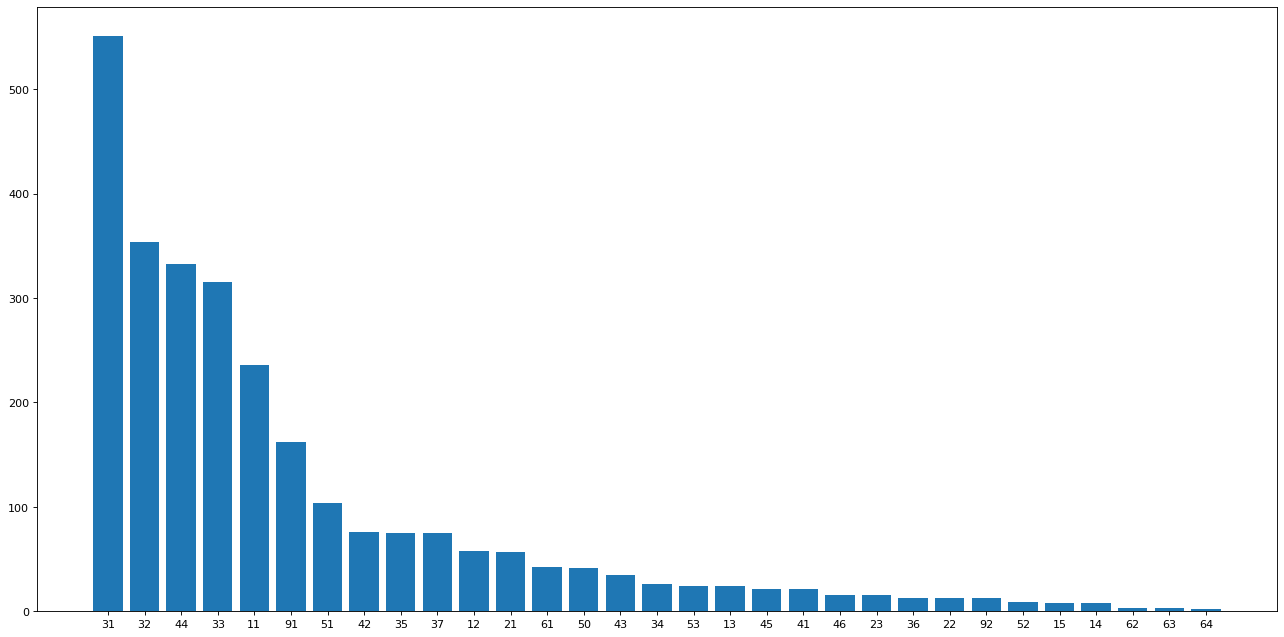

In [123]:
# 中国不同省份的星巴克数量，图像绘制
import matplotlib.pyplot as plt

country_cn = df[df['Country'] == 'CN']
china_province = country_cn.groupby(by="State/Province").count()['Brand'].sort_values(ascending=False)
plt.figure(figsize=(20, 10), dpi=80)
plt.bar(china_province.index, china_province.values)

In [126]:
print(china_province.index)

Index(['31', '32', '44', '33', '11', '91', '51', '42', '35', '37', '12', '21',
       '61', '50', '43', '34', '53', '13', '45', '41', '46', '23', '36', '22',
       '92', '52', '15', '14', '62', '63', '64'],
      dtype='object', name='State/Province')


In [127]:
grouped1 = df[["Brand"]].groupby(by=[df["Country"], df["State/Province"]]).count()
print(grouped1)

                        Brand
Country State/Province       
AD      7                   1
AE      AJ                  2
        AZ                 48
        DU                 82
        FU                  2
...                       ...
US      WV                 25
        WY                 23
VN      HN                  6
        SG                 19
ZA      GT                  3

[545 rows x 1 columns]


In [128]:
grouped2 = df.groupby(by=[df["Country"], df["State/Province"]]).count()
print(grouped2)

                        Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        

In [130]:
# 这里可以看出32对应的省是江苏
print(country_cn[country_cn['State/Province'] == '32'])

          Brand  Store Number                         Store Name  \
3062  Starbucks  48862-265746          Changshu Fangta Street-GF   
3063  Starbucks  48238-258108  CZ Wujin Kaia Lomo Plaza Store-GF   
3064  Starbucks  26608-244608        Nanjing Sun Palace Store-GF   
3065  Starbucks  48586-263487  NT Haimen Zhongnan Plaza Store-GF   
3066  Starbucks  49404-268987    NT Rudong wenfeng Dept Store-GF   
...         ...           ...                                ...   
3411  Starbucks  24743-238567                          镇江丹阳吾悦广场店   
3412  Starbucks  24065-234944                            丹阳金鹰天地店   
3413  Starbucks  24740-238713                         泰州靖江泰和国际城店   
3414  Starbucks  24336-236945                         泰州靖江文峰大世界店   
3415  Starbucks  47324-257587                          扬州高邮世贸广场店   

     Ownership Type                               Street Address       City  \
3062  Joint Venture              Fangta Street and HeDong Street   Changshu   
3063  Joint Venture  Huay

# 设置索引

In [135]:
# 索引中单项不可变，但是整体可以换掉
a = pd.DataFrame({'a': range(7), 'b': range(7, 0, -1),
                  'c': ['one', 'one', 'one', 'two', 'two', 'two', 'two'],
                  'd': list("hjklmno")})
print(a)

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


In [136]:
c = a.copy()
print(c)
print('\n')
a.index = list('abcdefg')  # a的索引变了，a.index更换索引
print(c)
print('\n')
print(a)
print('\n')
b = c.reindex(list('abcdefg'))  # reindex以设置的新索引返回一个新的df，c索引不变,b是没有值的
print(c)
print('\n')
print(b)

   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o


   a  b    c  d
0  0  7  one  h
1  1  6  one  j
2  2  5  one  k
3  3  4  two  l
4  4  3  two  m
5  5  2  two  n
6  6  1  two  o


    a   b    c    d
a NaN NaN  NaN  NaN
b NaN NaN  NaN  NaN
c NaN NaN  NaN  NaN
d NaN NaN  NaN  NaN
e NaN NaN  NaN  NaN
f NaN NaN  NaN  NaN
g NaN NaN  NaN  NaN


In [137]:
#让某些列变为索引，让c列，d列数据变为索引
print(a)
print('\n')
print(a.set_index(['c', 'd']))  # 返回修改后的df
print('\n')
print(a)  # a没变

   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o


       a  b
c   d      
one h  0  7
    j  1  6
    k  2  5
two l  3  4
    m  4  3
    n  5  2
    o  6  1


   a  b    c  d
a  0  7  one  h
b  1  6  one  j
c  2  5  one  k
d  3  4  two  l
e  4  3  two  m
f  5  2  two  n
g  6  1  two  o


## 时间序列

In [138]:
pd.date_range(start="20190101", end="20190924")

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2019-09-15', '2019-09-16', '2019-09-17', '2019-09-18',
               '2019-09-19', '2019-09-20', '2019-09-21', '2019-09-22',
               '2019-09-23', '2019-09-24'],
              dtype='datetime64[ns]', length=267, freq='D')

In [139]:
pd.date_range(start="20210712", periods=10, freq='B')  # 工作日

DatetimeIndex(['2021-07-12', '2021-07-13', '2021-07-14', '2021-07-15',
               '2021-07-16', '2021-07-19', '2021-07-20', '2021-07-21',
               '2021-07-22', '2021-07-23'],
              dtype='datetime64[ns]', freq='B')

In [140]:
pd.date_range(start="20190101", periods=10, freq='M')  # 月末

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31'],
              dtype='datetime64[ns]', freq='M')

In [141]:
pd.date_range(start="20190101", periods=10, freq='MS')  # 月首

DatetimeIndex(['2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [142]:
pd.date_range(start="20210421", periods=10, freq='W')  # 周日

DatetimeIndex(['2021-04-25', '2021-05-02', '2021-05-09', '2021-05-16',
               '2021-05-23', '2021-05-30', '2021-06-06', '2021-06-13',
               '2021-06-20', '2021-06-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [143]:
s = pd.Series(['3/11/2000', '3/12/2000', '3/13/2000'] * 1000)
print(s)

0       3/11/2000
1       3/12/2000
2       3/13/2000
3       3/11/2000
4       3/12/2000
          ...    
2995    3/12/2000
2996    3/13/2000
2997    3/11/2000
2998    3/12/2000
2999    3/13/2000
Length: 3000, dtype: object


In [145]:
# timeit可以统计执行耗时，to_datetime把字符串转为时间格式
% timeit pd.to_datetime(s, infer_datetime_format=True)

912 µs ± 15.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   
1  40.258061 -75.264680  BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...   
2  40.121182 -75.351975  HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...   
3  40.116153 -75.343513  AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...   
4  40.251492 -75.603350  CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...   

       zip                    title           timeStamp                twp  \
0  19525.0   EMS: BACK PAINS/INJURY 2015-12-10 17:10:52        NEW HANOVER   
1  19446.0  EMS: DIABETIC EMERGENCY 2015-12-10 17:29:21  HATFIELD TOWNSHIP   
2  19401.0      Fire: GAS-ODOR/LEAK 2015-12-10 14:39:21         NORRISTOWN   
3  19401.0   EMS: CARDIAC EMERGENCY 2015-12-10 16:47:36         NORRISTOWN   
4      NaN           EMS: DIZZINESS 2015-12-10 16:56:52   LOWER POTTSGROVE   

                         addr  e  
0      REINDEER CT & DEAD E

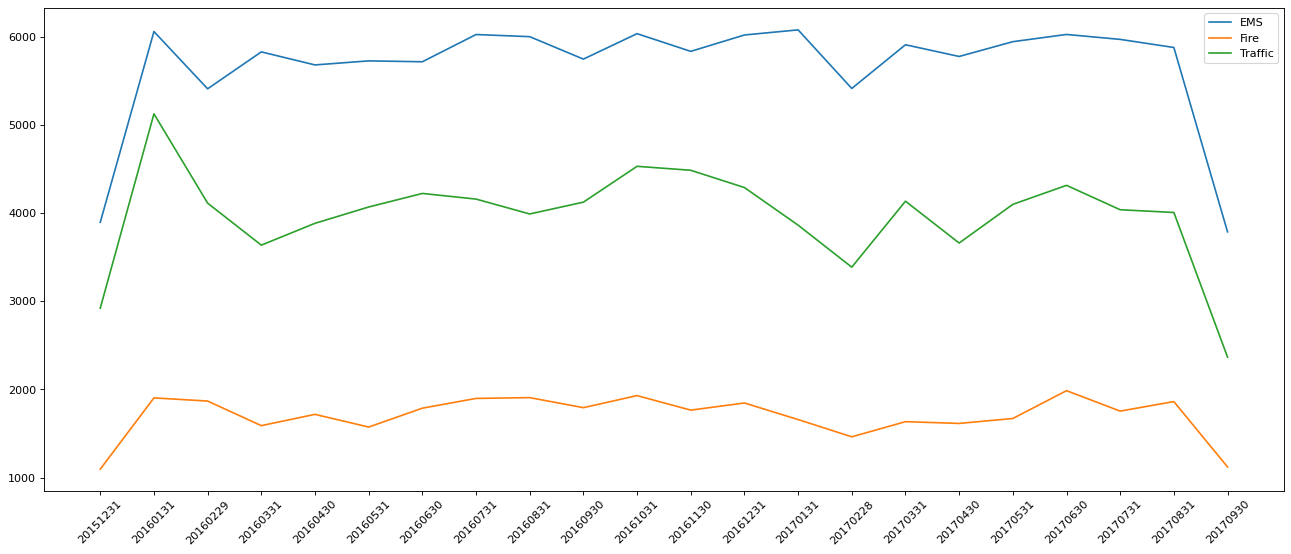

In [148]:
# 实战美国911电话数据
from matplotlib import pyplot as plt

# 把时间字符串转为时间类型，并设置为索引
df = pd.read_csv("./911.csv")
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
print(df.head())
print('\n')
# 添加列，表示分类
temp_list = df["title"].str.split(": ").tolist()
cate_list = [i[0] for i in temp_list]  # i[0]就是EMS  Fire  Traffic
# print(cate_list)
# print(np.array(cate_list).reshape((df.shape[0], 1)))
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0], 1)))  # 添加一列
df.set_index("timeStamp", inplace=True)
print(df.head())
print('\n')
plt.figure(figsize=(20, 8), dpi=80)
# 分组,一图多线
for group_name, group_data in df.groupby(by="cate"):
    # 对不同的分类都进行绘图
    count_by_month = group_data.resample("M").count()["title"]  # 降采样
    print(count_by_month)
    print('\n')
    # 画图
    _x = count_by_month.index
    print(_x)
    print('\n')
    _y = count_by_month.values
    _x = [i.strftime("%Y%m%d") for i in _x]  # 变年月日格式
    plt.plot(_x, _y, label=group_name)
plt.xticks(range(len(_x)), _x, rotation=45)
plt.legend(loc="best")
plt.show()

In [149]:
# PM2.5实战

file_path = "./PM2.5/BeijingPM20100101_20151231.csv"

df = pd.read_csv(file_path)
print(df.head())
print('\n')
# 把分开的时间字符串通过periodIndex的方法转化为pandas的时间类型
period = pd.PeriodIndex(year=df["year"], month=df["month"], day=df["day"],
                        hour=df["hour"], freq="H")
df["datetime"] = period
print(df.head())

   No  year  month  day  hour  season  PM_Dongsi  PM_Dongsihuan  \
0   1  2010      1    1     0       4        NaN            NaN   
1   2  2010      1    1     1       4        NaN            NaN   
2   3  2010      1    1     2       4        NaN            NaN   
3   4  2010      1    1     3       4        NaN            NaN   
4   5  2010      1    1     4       4        NaN            NaN   

   PM_Nongzhanguan  PM_US Post  DEWP  HUMI    PRES  TEMP cbwd    Iws  \
0              NaN         NaN -21.0  43.0  1021.0 -11.0   NW   1.79   
1              NaN         NaN -21.0  47.0  1020.0 -12.0   NW   4.92   
2              NaN         NaN -21.0  43.0  1019.0 -11.0   NW   6.71   
3              NaN         NaN -21.0  55.0  1019.0 -14.0   NW   9.84   
4              NaN         NaN -20.0  51.0  1018.0 -12.0   NW  12.97   

   precipitation  Iprec  
0            0.0    0.0  
1            0.0    0.0  
2            0.0    0.0  
3            0.0    0.0  
4            0.0    0.0  


   No 

In [150]:
# 把datetime设置为索引
df.set_index("datetime", inplace=True)
# 进行降采样，行索引必须是pd的时间类型
df = df.resample("7D").mean()
print(df.head())

               No    year     month        day  hour  season  PM_Dongsi  \
datetime                                                                  
2010-01-01   84.5  2010.0  1.000000   4.000000  11.5     4.0        NaN   
2010-01-08  252.5  2010.0  1.000000  11.000000  11.5     4.0        NaN   
2010-01-15  420.5  2010.0  1.000000  18.000000  11.5     4.0        NaN   
2010-01-22  588.5  2010.0  1.000000  25.000000  11.5     4.0        NaN   
2010-01-29  756.5  2010.0  1.571429  14.285714  11.5     4.0        NaN   

            PM_Dongsihuan  PM_Nongzhanguan  PM_US Post       DEWP       HUMI  \
datetime                                                                       
2010-01-01            NaN              NaN   71.627586 -18.255952  54.395833   
2010-01-08            NaN              NaN   69.910714 -19.035714  49.386905   
2010-01-15            NaN              NaN  163.654762 -12.630952  57.755952   
2010-01-22            NaN              NaN   68.069307 -17.404762  34.0952

In [151]:
df.iloc[312]

No                 52500.500000
year                2015.000000
month                 12.000000
day                   28.000000
hour                  11.500000
season                 4.000000
PM_Dongsi            206.271084
PM_Dongsihuan        219.377358
PM_Nongzhanguan      199.566265
PM_US Post           209.244048
DEWP                  -8.559524
HUMI                  70.136905
PRES                1029.934524
TEMP                  -3.202381
Iws                    8.713750
precipitation          0.000000
Iprec                  0.000000
Name: 2015-12-25, dtype: float64

datetime
2013-01-11    277.731707
2013-01-18    188.244048
2013-01-25    261.263473
2013-02-01     72.845238
2013-02-08    125.832335
                 ...    
2014-11-07     51.209581
2014-11-14    153.695122
2014-11-21    131.175000
2014-11-28     84.083333
2014-12-05     89.375839
Freq: 7D, Name: PM_US Post, Length: 100, dtype: float64


datetime
2013-01-11     65.333333
2013-01-18    161.054217
2013-01-25    224.006098
2013-02-01     61.145570
2013-02-08    110.478788
                 ...    
2014-11-07     51.617284
2014-11-14    149.935065
2014-11-21    142.590062
2014-11-28     82.012346
2014-12-05    105.767857
Freq: 7D, Name: PM_Nongzhanguan, Length: 100, dtype: float64


PeriodIndex(['2013-01-11', '2013-01-18', '2013-01-25', '2013-02-01',
             '2013-02-08', '2013-02-15', '2013-02-22', '2013-03-01',
             '2013-03-08', '2013-03-15',
             ...
             '2015-10-23', '2015-10-30', '2015-11-06', '2015-11-13',
             '2015-11-20', '2015-11-27', '2015

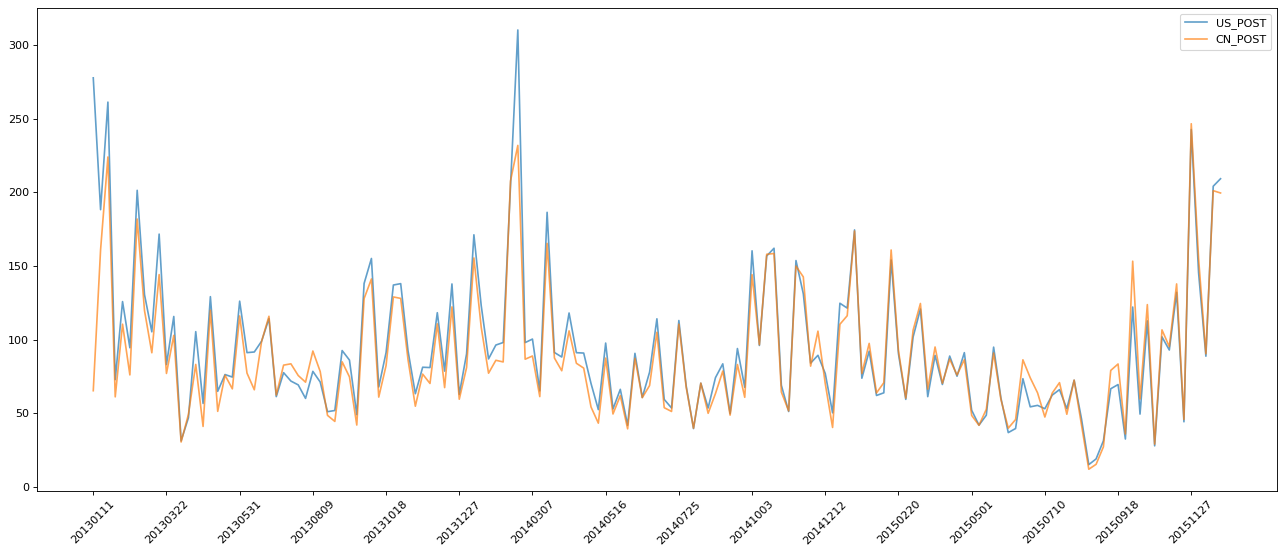

In [157]:
# 对比农展馆和美国测试的数据
df = df.loc[:, ["PM_US Post", "PM_Nongzhanguan"]]  # 取这两列
df = df.dropna()  # 任何一个为空，整个样本去掉
data = df.loc[:, "PM_US Post"]
print(data.head(100))
print('\n')
data_china = df.loc[:, "PM_Nongzhanguan"]
print(data_china.head(100))
print('\n')
# 画图
_x = data.index
print(_x)
print('\n')
_x = [i.strftime("%Y%m%d") for i in _x]
_x_china = [i.strftime("%Y%m%d") for i in data_china.index]
print(len(_x), len(_x_china))
print('\n')
_y = data.values  # 美国
_y_china = data_china.values  # 中国
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(range(len(_x)), _y, label="US_POST", alpha=0.7)
plt.plot(range(len(_x_china)), _y_china, label="CN_POST", alpha=0.7)
plt.xticks(range(0, len(_x_china), 10), list(_x_china)[::10], rotation=45)
plt.legend(loc="best")
plt.show()

## 分组运算

In [3]:
import pandas as pd
import numpy as np

dict_obj = {'key1': ['a', 'b', 'a', 'b',
                     'a', 'b', 'a', 'a'],
            'key2': ['one', 'one', 'two', 'three',
                     'two', 'two', 'one', 'three'],
            'data1': np.random.randint(1, 10, 8),
            'data2': np.random.randint(1, 10, 8)}
df_obj = pd.DataFrame(dict_obj)
print(df_obj)
print('\n')
# 按key1分组后，计算data1，data2的统计信息并附加到原始表格中，并添加表头前缀
k1_sum = df_obj.groupby('key1').sum().add_prefix('sum_')
print(k1_sum)

  key1   key2  data1  data2
0    a    one      1      2
1    b    one      7      4
2    a    two      4      8
3    b  three      5      2
4    a    two      8      7
5    b    two      6      3
6    a    one      3      8
7    a  three      4      3


      sum_data1  sum_data2
key1                      
a            20         28
b            18          9


In [7]:
# 两个df之间进行连接
# 和mysql的join是一致的，on 连接条件
k1_sum_merge = pd.merge(df_obj, k1_sum, left_on='key1', right_index=True)
print(k1_sum_merge)

  key1   key2  data1  data2  sum_data1  sum_data2
0    a    one      1      2         20         28
2    a    two      4      8         20         28
4    a    two      8      7         20         28
6    a    one      3      8         20         28
7    a  three      4      3         20         28
1    b    one      7      4         18          9
3    b  three      5      2         18          9
5    b    two      6      3         18          9


In [9]:
# 方法2，使用transform
k1_sum_tf = df_obj.groupby('key1').transform(np.sum).add_prefix('sum_')
print(k1_sum_tf)
# df_obj[k1_sum_tf.columns] = k1_sum_tf
# print(df_obj)

            sum_key2 sum_data1 sum_data2
0  onetwotwoonethree        20        28
1        onethreetwo        18         9
2  onetwotwoonethree        20        28
3        onethreetwo        18         9
4  onetwotwoonethree        20        28
5        onethreetwo        18         9
6  onetwotwoonethree        20        28
7  onetwotwoonethree        20        28


In [12]:
print(df_obj.groupby('key1').mean())

      data1  data2
key1              
a       4.0    5.6
b       6.0    3.0


In [11]:
print(df_obj)

  key1   key2  data1  data2
0    a    one      1      2
1    b    one      7      4
2    a    two      4      8
3    b  three      5      2
4    a    two      8      7
5    b    two      6      3
6    a    one      3      8
7    a  three      4      3


In [ ]:
df_obj.groupby('key1').transform(np.mean)

In [13]:
def diff_mean(s):
    """
        返回数据与均值的差值
    """
    return s - s.mean()


print(df_obj.groupby('key1').transform(diff_mean))

   data1  data2
0   -3.0   -3.6
1    1.0    1.0
2    0.0    2.4
3   -1.0   -1.0
4    4.0    1.4
5    0.0    0.0
6   -1.0    2.4
7    0.0   -2.6


C:\Users\yf\AppData\Local\Temp\ipykernel_5464\3374592228.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  print(df_obj.groupby('key1').transform(diff_mean))


# 星际争霸

In [14]:
import pandas as pd

dataset_path = './starcraft.csv'
df_data = pd.read_csv(dataset_path, usecols=['LeagueIndex', 'Age', 'HoursPerWeek',
                                             'TotalHours', 'APM'])
print(df_data)

      LeagueIndex   Age  HoursPerWeek  TotalHours       APM
0               5  27.0          10.0      3000.0  143.7180
1               5  23.0          10.0      5000.0  129.2322
2               4  30.0          10.0       200.0   69.9612
3               3  19.0          20.0       400.0  107.6016
4               3  32.0          10.0       500.0  122.8908
...           ...   ...           ...         ...       ...
3390            8   NaN           NaN         NaN  259.6296
3391            8   NaN           NaN         NaN  314.6700
3392            8   NaN           NaN         NaN  299.4282
3393            8   NaN           NaN         NaN  375.8664
3394            8   NaN           NaN         NaN  348.3576

[3395 rows x 5 columns]


In [17]:
def top_n(df, n=3, column='APM'):
    """
        返回每个分组按column的top n数据
    """
    return df.sort_values(by=column, ascending=False)[:n]


print(df_data.groupby('LeagueIndex').apply(top_n))

                  LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           2214            1  20.0          12.0       730.0  172.9530
            2246            1  27.0           8.0       250.0  141.6282
            1753            1  20.0          28.0       100.0  139.6362
2           3062            2  20.0           6.0       100.0  179.6250
            3229            2  16.0          24.0       110.0  156.7380
            1520            2  29.0           6.0       250.0  151.6470
3           1557            3  22.0           6.0       200.0  226.6554
            484             3  19.0          42.0       450.0  220.0692
            2883            3  16.0           8.0       800.0  208.9500
4           2688            4  26.0          24.0       990.0  249.0210
            1759            4  16.0           6.0        75.0  229.9122
            2637            4  23.0          24.0       650.0  2

In [20]:
# apply函数接收的参数会传入自定义的函数中
m = df_data.groupby('LeagueIndex').apply(top_n, n=2, column='Age')
print(m)
print('\n')
print(m.index)

                  LeagueIndex   Age  HoursPerWeek  TotalHours       APM
LeagueIndex                                                            
1           3146            1  40.0          12.0       150.0   38.5590
            3040            1  39.0          10.0       500.0   29.8764
2           920             2  43.0          10.0       730.0   86.0586
            2437            2  41.0           4.0       200.0   54.2166
3           1258            3  41.0          14.0       800.0   77.6472
            2972            3  40.0          10.0       500.0   60.5970
4           1696            4  44.0           6.0       500.0   89.5266
            1729            4  39.0           8.0       500.0   86.7246
5           202             5  37.0          14.0       800.0  327.7218
            2745            5  37.0          18.0      1000.0  123.4098
6           3069            6  31.0           8.0       800.0  133.1790
            2706            6  31.0           8.0       700.0   

In [22]:
# group_keys为False后，被groupby的列不会变为索引
n = df_data.groupby('LeagueIndex', group_keys=False).apply(top_n)
print(n.index)

Int64Index([2214, 2246, 1753, 3062, 3229, 1520, 1557,  484, 2883, 2688, 1759,
            2637, 3277,   93,  202,  734, 2746, 1810, 3127,  104, 1654, 3393,
            3373, 3372],
           dtype='int64')


# 10 数据清洗

In [23]:
import pandas as pd
import numpy as np

df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1': np.random.randint(0, 10, 7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                        'data2': np.random.randint(0, 10, 3)})

print(df_obj1)
print('\n')
print(df_obj2)

  key  data1
0   b      5
1   b      9
2   a      8
3   c      6
4   a      4
5   a      9
6   b      1


  key  data2
0   a      2
1   b      8
2   d      3


In [25]:
# 默认连接使用相同的列名，连接方式是内连接
print(pd.merge(df_obj1, df_obj2))

  key  data1  data2
0   b      5      8
1   b      9      8
2   b      1      8
3   a      8      2
4   a      4      2
5   a      9      2


In [26]:
# 左表和右表都拿索引连接
pd.merge(df_obj1, df_obj2, left_index=True, right_index=True)

,key_x,data1,key_y,data2
0,b,5,a,2
1,b,9,b,8
2,a,8,d,3


In [27]:
# 左表和右表都拿key列来连接
pd.merge(df_obj1, df_obj2, on='key')

,key,data1,data2
0,b,5,8
1,b,9,8
2,b,1,8
3,a,8,2
4,a,4,2
5,a,9,2


In [28]:
# 更改列名
df_obj1 = df_obj1.rename(columns={'key': 'key1'})
df_obj2 = df_obj2.rename(columns={'key': 'key2'})

In [29]:
df_obj1

,key1,data1
0,b,5
1,b,9
2,a,8
3,c,6
4,a,4
5,a,9
6,b,1


In [30]:
df_obj2

,key2,data2
0,a,2
1,b,8
2,d,3


In [31]:
# 左表以key1来连接，右表以key2来连接
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2')

,key1,data1,key2,data2
0,b,5,b,8
1,b,9,b,8
2,b,1,b,8
3,a,8,a,2
4,a,4,a,2
5,a,9,a,2


In [32]:
# 全外连接
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='outer')

,key1,data1,key2,data2
0,b,5.0,b,8.0
1,b,9.0,b,8.0
2,b,1.0,b,8.0
3,a,8.0,a,2.0
4,a,4.0,a,2.0
5,a,9.0,a,2.0
6,c,6.0,NaN,NaN
7,NaN,NaN,d,3.0


In [33]:
#left join 等价于 left outer join
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='left')

,key1,data1,key2,data2
0,b,5,b,8.0
1,b,9,b,8.0
2,a,8,a,2.0
3,c,6,NaN,NaN
4,a,4,a,2.0
5,a,9,a,2.0
6,b,1,b,8.0


In [34]:
# right等价于数据库的right join
pd.merge(df_obj1, df_obj2, left_on='key1', right_on='key2', how='right')

,key1,data1,key2,data2
0,a,8.0,a,2
1,a,4.0,a,2
2,a,9.0,a,2
3,b,5.0,b,8
4,b,9.0,b,8
5,b,1.0,b,8
6,NaN,NaN,d,3


In [ ]:
# 处理重复列名
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data': np.random.randint(0, 10, 7)})
df_obj2 = pd.DataFrame({'key': ['a', 'b', 'd'],
                        'data': np.random.randint(0, 10, 3)})
#给相同的数据列添加后缀
print(pd.merge(df_obj1, df_obj2, on='key', suffixes=('_left', '_right')))

In [35]:
# 按索引连接
df_obj1 = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                        'data1': np.random.randint(0, 10, 7)})
df_obj2 = pd.DataFrame({'data2': np.random.randint(0, 10, 3)}, index=['a', 'b', 'd'])
print(df_obj1)
print('\n')
print(df_obj2)
print('\n')
print(pd.merge(df_obj1, df_obj2, left_on='key', right_index=True))

  key  data1
0   b      9
1   b      2
2   a      6
3   c      5
4   a      8
5   a      5
6   b      2


   data2
a      4
b      1
d      4


  key  data1  data2
0   b      9      1
1   b      2      1
6   b      2      1
2   a      6      4
4   a      8      4
5   a      5      4


In [36]:
pd.merge(df_obj2, df_obj1, left_index=True, right_on='key')

,data2,key,data1
2,4,a,6
4,4,a,8
5,4,a,5
0,1,b,9
1,1,b,2
6,1,b,2


# 数据合并(pd.concat)

In [37]:
# np里边的合并
arr1 = np.random.randint(0, 10, (3, 4))
arr2 = np.random.randint(0, 10, (3, 4))

print(arr1)
print('\n')
print(arr2)
print('\n')

print(np.concatenate([arr1, arr2]))
print('\n')
print(np.concatenate([arr1, arr2], axis=1))

[[1 2 4 5]
 [7 0 5 3]
 [6 6 0 2]]


[[4 5 7 7]
 [0 0 6 9]
 [1 4 0 9]]


[[1 2 4 5]
 [7 0 5 3]
 [6 6 0 2]
 [4 5 7 7]
 [0 0 6 9]
 [1 4 0 9]]


[[1 2 4 5 4 5 7 7]
 [7 0 5 3 0 0 6 9]
 [6 6 0 2 1 4 0 9]]


## index没有重复的情况

In [ ]:
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(0, 5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(5, 9))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(9, 12))
print(ser_obj1)
print('\n')
print(ser_obj2)
print('\n')
print(ser_obj3)

In [39]:
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))
print('\n')
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1))

0     4
1     8
2     1
3     3
4     5
5     9
6     0
7     5
8     1
9     6
10    9
11    7
dtype: int32


      0    1    2
0   4.0  NaN  NaN
1   8.0  NaN  NaN
2   1.0  NaN  NaN
3   3.0  NaN  NaN
4   5.0  NaN  NaN
5   NaN  9.0  NaN
6   NaN  0.0  NaN
7   NaN  5.0  NaN
8   NaN  1.0  NaN
9   NaN  NaN  6.0
10  NaN  NaN  9.0
11  NaN  NaN  7.0


## index 有重复的情况

In [40]:
# index有重复的情况
ser_obj1 = pd.Series(np.random.randint(0, 10, 5), index=range(5))
ser_obj2 = pd.Series(np.random.randint(0, 10, 4), index=range(4))
ser_obj3 = pd.Series(np.random.randint(0, 10, 3), index=range(3))

print(ser_obj1)
print('\n')
print(ser_obj2)
print('\n')
print(ser_obj3)

0    7
1    5
2    5
3    2
4    1
dtype: int32


0    8
1    2
2    9
3    9
dtype: int32


0    2
1    1
2    2
dtype: int32


In [41]:
# 相同索引名直接往下排
print(pd.concat([ser_obj1, ser_obj2, ser_obj3]))

0    7
1    5
2    5
3    2
4    1
0    8
1    2
2    9
3    9
0    2
1    1
2    2
dtype: int32


In [44]:
#inner和outer代表内连接和全外连接
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1, join='inner'))
print('\n')
print(pd.concat([ser_obj1, ser_obj2, ser_obj3], axis=1, join='outer'))

   0  1  2
0  7  8  2
1  5  2  1
2  5  9  2


   0    1    2
0  7  8.0  2.0
1  5  2.0  1.0
2  5  9.0  2.0
3  2  9.0  NaN
4  1  NaN  NaN


In [45]:
# df的concat
import pandas as pd
import numpy as np

df_obj1 = pd.DataFrame(np.random.randint(0, 10, (3, 2)), index=['a', 'b', 'c'],
                       columns=['A', 'B'])
df_obj2 = pd.DataFrame(np.random.randint(0, 10, (2, 2)), index=['a', 'b'],
                       columns=['A', 'B'])
print(df_obj1)
print('\n')
print(df_obj2)
print('\n')

print(pd.concat([df_obj1, df_obj2]))
print('\n')
print(pd.concat([df_obj1, df_obj2], axis=1))

   A  B
a  9  5
b  2  7
c  2  1


   A  B
a  7  1
b  0  4


   A  B
a  9  5
b  2  7
c  2  1
a  7  1
b  0  4


   A  B    A    B
a  9  5  7.0  1.0
b  2  7  0.0  4.0
c  2  1  NaN  NaN


# 数据重构

In [46]:
df_obj = pd.DataFrame(np.random.randint(0, 10, (5, 2)), columns=['data1', 'data2'])
print(df_obj)
print('\n')
# 对df进行stack，就会变成mutiindex的series
stacked = df_obj.stack()  # stack内部带的参数level，选择哪一个column变为index
print(stacked)

   data1  data2
0      9      9
1      8      6
2      1      9
3      6      1
4      8      0


0  data1    9
   data2    9
1  data1    8
   data2    6
2  data1    1
   data2    9
3  data1    6
   data2    1
4  data1    8
   data2    0
dtype: int32


In [48]:
# 默认操作内层索引
print(stacked.unstack())
print('\n')
# 通过level指定操作索引的级别，level=0操作外层索引
print(stacked.unstack(level=0))

   data1  data2
0      9      9
1      8      6
2      1      9
3      6      1
4      8      0


       0  1  2  3  4
data1  9  8  1  6  8
data2  9  6  9  1  0


In [55]:
# stack和unstack对df操作
index1 = pd.MultiIndex.from_arrays([['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c', 'd', 'd', 'd'],
                                    [0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2]], names=['cloth', 'size'])
df = pd.DataFrame(np.arange(24).reshape(12, 2), index=index1, columns=['data1', 'data2'])

print(df)
print('\n')

df_s = df.unstack(level=0)  # 把行索引中的一个级别拿到列索引
print(df_s)
print('\n')

print(df_s.columns)  # 看到columns索引变为层级索引
print('\n')

print(df_s.stack(0))  # 把columns上的0层索引放到index的内层索引

            data1  data2
cloth size              
a     0         0      1
      1         2      3
      2         4      5
b     0         6      7
      1         8      9
      2        10     11
c     0        12     13
      1        14     15
      2        16     17
d     0        18     19
      1        20     21
      2        22     23


      data1             data2            
cloth     a   b   c   d     a   b   c   d
size                                     
0         0   6  12  18     1   7  13  19
1         2   8  14  20     3   9  15  21
2         4  10  16  22     5  11  17  23


MultiIndex([('data1', 'a'),
            ('data1', 'b'),
            ('data1', 'c'),
            ('data1', 'd'),
            ('data2', 'a'),
            ('data2', 'b'),
            ('data2', 'c'),
            ('data2', 'd')],
           names=[None, 'cloth'])


cloth       a   b   c   d
size                     
0    data1  0   6  12  18
     data2  1   7  13  19
1    data1  2   8  14  20
   

# 处理重复数据

In [56]:
df_obj = pd.DataFrame({'data1': ['a'] * 4 + ['b'] * 4,
                       'data2': np.random.randint(0, 4, 8)})
print(df_obj)

  data1  data2
0     a      2
1     a      1
2     a      1
3     a      2
4     b      1
5     b      0
6     b      3
7     b      1


In [57]:
print(df_obj.duplicated())
print('\n')
df_obj[~df_obj.duplicated()]  # 取出不重复行

0    False
1    False
2     True
3     True
4    False
5    False
6    False
7     True
dtype: bool




,data1,data2
0,a,2
1,a,1
4,b,1
5,b,0
6,b,3


In [58]:
# 按照某一列去重
print(df_obj.duplicated('data2'))

0    False
1    False
2     True
3     True
4     True
5    False
6    False
7     True
dtype: bool


In [59]:
df_obj1 = pd.DataFrame({'data1': [np.nan] * 4,
                        'data2': list('1235')})
print(df_obj1)

   data1 data2
0    NaN     1
1    NaN     2
2    NaN     3
3    NaN     5


In [60]:
# 在pd的duplicated认为空值和空值相等的
df_obj1.duplicated('data1')
print(df_obj1.drop_duplicates('data1'))

   data1 data2
0    NaN     1


In [61]:
print(df_obj.drop_duplicates())  # 删除重复行
print(df_obj.drop_duplicates('data2'))

  data1  data2
0     a      2
1     a      1
4     b      1
5     b      0
6     b      3
  data1  data2
0     a      2
1     a      1
5     b      0
6     b      3


In [62]:
# 如果要在原有的df上去重，需要加inplace=True
print(df_obj)

  data1  data2
0     a      2
1     a      1
2     a      1
3     a      2
4     b      1
5     b      0
6     b      3
7     b      1


In [63]:
ser_obj = pd.Series(np.random.randint(0, 10, 10))  # series 用map
print(ser_obj)
print('\n')
print(ser_obj.map(lambda x: x ** 2))

0    9
1    7
2    8
3    4
4    9
5    4
6    7
7    5
8    2
9    4
dtype: int32


0    81
1    49
2    64
3    16
4    81
5    16
6    49
7    25
8     4
9    16
dtype: int64


In [66]:
ser_obj = pd.Series(np.arange(10), index=range(3, 13))
print(ser_obj)
print('\n')
# 单个值替换单个值
print(ser_obj.replace(1, -100))
print('\n')
# 多个值替换一个值
print(ser_obj.replace(range(6, 9), -100))
print('\n')
# 多个值替换多个值
print(ser_obj.replace([4, 7], [-100, -200]))

3     0
4     1
5     2
6     3
7     4
8     5
9     6
10    7
11    8
12    9
dtype: int32


3       0
4    -100
5       2
6       3
7       4
8       5
9       6
10      7
11      8
12      9
dtype: int32


3       0
4       1
5       2
6       3
7       4
8       5
9    -100
10   -100
11   -100
12      9
dtype: int32


3       0
4       1
5       2
6       3
7    -100
8       5
9       6
10   -200
11      8
12      9
dtype: int32


In [70]:
df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'a', 'c', 'd', 'e']})
print(df)

   A  B  C
0  0  5  a
1  1  6  a
2  2  7  c
3  3  8  d
4  4  9  e


In [71]:
df.replace(to_replace=r'^a', value=100, regex=True)  # 正则

,A,B,C
0,0,5,100
1,1,6,100
2,2,7,c
3,3,8,d
4,4,9,e


In [72]:
df.dtypes

A     int64
B     int64
C    object
dtype: object